In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
text_data = '../data/raw_analyst_ratings.csv'

try:
    df_csv = pd.read_csv(text_data, engine='python')
    print("CSV file loaded successfully.")
    print(df_csv.head())
except FileNotFoundError:
    print(f"Error: The file '{text_data}' was not found.")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")

CSV file loaded successfully.
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  

In [3]:
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [4]:
# Applying the sentiment analysis function to headlines
df_csv['Sentiment'] = df_csv['headline'].apply(calculate_sentiment)

In [5]:
df_csv.head()

,Unnamed: 0,headline,url,publisher,date,stock,Sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0


In [6]:
# Descriptive statistics for the 'headline' column
print("Descriptive statistics for 'headline' column:")
print(df_csv['headline'].describe())

Descriptive statistics for 'headline' column:
count                     1407328
unique                     845770
top       Benzinga's Top Upgrades
freq                         5449
Name: headline, dtype: object


In [7]:
# Check for missing values in the 'headline' column
print("\nMissing values in 'headline' column:")
print(df_csv['headline'].isnull().sum())


Missing values in 'headline' column:
0


In [8]:
# Get the number of unique headlines
print("\nNumber of unique headlines:")
print(df_csv['headline'].nunique())


Number of unique headlines:
845770


In [9]:
# Display the most frequent sentiment values
print("\nMost frequent headlines:")
print(df_csv['Sentiment'].value_counts().head())


Most frequent headlines:
Sentiment
0.000000    934928
0.500000     86313
0.250000     31492
0.136364     16654
0.100000     15469
Name: count, dtype: int64



Sentiment distribution:
count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Sentiment, dtype: float64


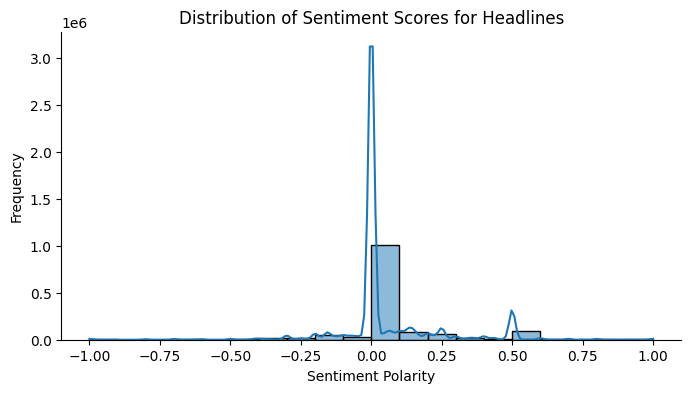

In [10]:
# Sentiment score distribution
print("\nSentiment distribution:")
print(df_csv['Sentiment'].describe())

# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 4))
sns.histplot(df_csv['Sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores for Headlines')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()